In [1]:
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict, KFold
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import warnings
warnings.filterwarnings('ignore')
import scikitplot as skplt

In [2]:
# load the data set
wdbc = pd.read_csv("wdbc.data",delimiter=',',header=None)

# converting the target variable to a factor with our target class 'M' as 1 and 'B' as 0
wdbc.iloc[:,1][wdbc.iloc[:,1] == 'B'] = 0
wdbc.iloc[:,1][wdbc.iloc[:,1] == 'M'] = 1

# splitting the data into training and testing sets
train_set, test_set = train_test_split(wdbc, test_size=0.2, random_state=42)

# since the first column in the data set is id, we do not need that and column 2 is our target variable.
X_train = train_set.iloc[:, 2:32]
Y_train = train_set.iloc[:,1]
Y_train=Y_train.astype('int')

X_test = test_set.iloc[:, 2:32]
Y_test = test_set.iloc[:,1]
Y_test=Y_test.astype('int')

In [3]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

In [4]:
# kNN Model

#For kNN scaled data needs to be used to ensure equal weightage is given to all variables.

# Parameter optimization for kNN - scaled version
from sklearn import neighbors
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [8,9,10,15]}]

knn_clfs = neighbors.KNeighborsClassifier()
grid_search1 = GridSearchCV(knn_clfs, param_grid, cv=5, n_jobs=-1,scoring='recall')
grid_search1.fit(X_train_scaled, Y_train)
print(grid_search1.best_params_)
print(grid_search1.best_score_)

{'n_neighbors': 8, 'weights': 'distance'}
0.91702415231827


Recall Score: 0.92 (+/- 0.10)
Precision Score: 0.98 (+/- 0.05)
Accuracy Score: 0.96 (+/- 0.04)


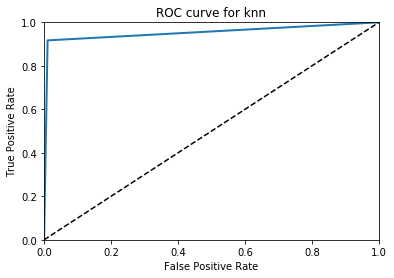

0.9533351264120495

In [5]:
knn_clf = neighbors.KNeighborsClassifier(weights = "distance",n_neighbors = 8)
scores = cross_val_score(knn_clf, X_train_scaled, Y_train, n_jobs=-1,cv=5, scoring="recall")
print("Recall Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(knn_clf, X_train_scaled, Y_train, n_jobs=-1,cv=5, scoring="precision")
print("Precision Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(knn_clf, X_train_scaled, Y_train, n_jobs=-1,cv=5, scoring="accuracy")
print("Accuracy Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
y_scores = cross_val_predict(knn_clf, X_train_scaled, Y_train, cv=5)
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC curve for knn')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

roc_auc_score(Y_train, y_scores)

In [6]:
# Logistic Model

# For Logistic also i am using scaled data to reduce the influce of high value attributes like 
# mean vs standard detviation or worst vs standard deviation

# Parameter optimization for Logistics Regression - scaled version
from sklearn import linear_model
param_grid = [{'C': [0.1,0.2,0.5,1,5,10],'penalty': ['l1', 'l2']}]

Logit_clfs = linear_model.LogisticRegression()
grid_search2 = GridSearchCV(Logit_clfs, param_grid, cv=5, n_jobs=-1,scoring='recall')
grid_search2.fit(X_train_scaled, Y_train)
print(grid_search2.best_params_)
print(grid_search2.best_score_)

{'C': 0.2, 'penalty': 'l1'}
0.9644825762472821


Recall Score: 0.96 (+/- 0.06)
Precision Score: 0.98 (+/- 0.05)
Accuracy Score: 0.98 (+/- 0.02)


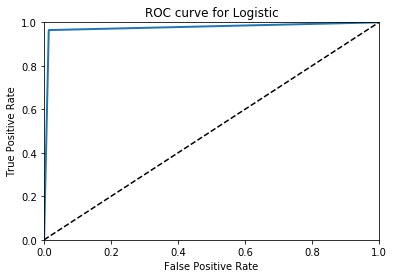

0.9752555137170523

In [7]:
Logit_clf = linear_model.LogisticRegression(C = 0.2,penalty = 'l1')
scores = cross_val_score(Logit_clf, X_train_scaled, Y_train,n_jobs=-1, cv=5, scoring="recall")
print("Recall Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(Logit_clf, X_train_scaled, Y_train,n_jobs=-1, cv=5, scoring="precision")
print("Precision Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(Logit_clf, X_train_scaled, Y_train,n_jobs=-1, cv=5, scoring="accuracy")
print("Accuracy Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
y_scores = cross_val_predict(Logit_clf, X_train_scaled, Y_train, cv=5)
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC curve for Logistic')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

roc_auc_score(Y_train, y_scores)

In [8]:
# Decision Tree

# For decision tree data standardization is not needed so using the main non scaled dataset
# Parameter optimization for Decision Trees
from sklearn import tree
param_grid = [{'max_depth': [5, 6, 7, 8, 9], 'min_samples_split': [8,9,10,11,12]}]

tree_clf = tree.DecisionTreeClassifier()
grid_search3 = GridSearchCV(tree_clf, param_grid, cv=5, n_jobs=-1,scoring='recall')
grid_search3.fit(X_train, Y_train)
print(grid_search3.best_params_)
print(grid_search3.best_score_)

{'max_depth': 6, 'min_samples_split': 8}
0.9286595757183993


In [9]:
# The above code for decision trees is giving different hyperparameters for each iteration in order to identify the most
# frequent combinations doing n trails and identifying the combination. 


# Number of random trials
NUM_TRIALS = 15

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)

# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "LabelKFold", "LeaveOneOut", "LeaveOneLabelOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(tree_clf, param_grid=[{'max_depth': [5, 6, 7, 8, 9], 'min_samples_split': [8,9,10,11,12]}],
                       cv=inner_cv, scoring='recall')
    clf.fit(X_train, Y_train)
    non_nested_scores[i] = clf.best_score_
    print(clf.best_params_)

{'max_depth': 7, 'min_samples_split': 11}
{'max_depth': 5, 'min_samples_split': 10}
{'max_depth': 5, 'min_samples_split': 12}
{'max_depth': 6, 'min_samples_split': 12}
{'max_depth': 7, 'min_samples_split': 11}
{'max_depth': 6, 'min_samples_split': 9}
{'max_depth': 6, 'min_samples_split': 10}
{'max_depth': 7, 'min_samples_split': 8}
{'max_depth': 6, 'min_samples_split': 8}
{'max_depth': 5, 'min_samples_split': 12}
{'max_depth': 9, 'min_samples_split': 11}
{'max_depth': 7, 'min_samples_split': 10}
{'max_depth': 8, 'min_samples_split': 8}
{'max_depth': 9, 'min_samples_split': 11}
{'max_depth': 5, 'min_samples_split': 9}


Recall Score: 0.90 (+/- 0.14)
Precision Score: 0.90 (+/- 0.07)
Accuracy Score: 0.94 (+/- 0.05)


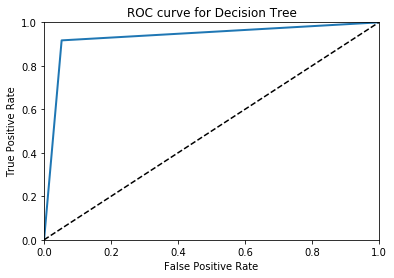

0.9323561054330285

In [10]:
tree_clf = tree.DecisionTreeClassifier(max_depth = 5,min_samples_split = 10)
scores = cross_val_score(tree_clf, X_train, Y_train, cv=5, n_jobs=-1,scoring="recall")
print("Recall Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(tree_clf, X_train, Y_train, cv=5, n_jobs=-1,scoring="precision")
print("Precision Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(tree_clf, X_train, Y_train, cv=5, n_jobs=-1,scoring="accuracy")
print("Accuracy Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
y_scores = cross_val_predict(tree_clf, X_train, Y_train, cv=5)
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC curve for Decision Tree')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

roc_auc_score(Y_train, y_scores)

In [11]:
# SVM 

# with different kernals and hyper parameters
from sklearn import svm
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1,1e-3,1e-4,1e-5],'C': [1, 10, 100, 1000,10000]},
                    {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]},
                    {'kernel': ['poly'], 'degree': [1,2,3],'C': [1, 10, 100, 1000,10000]}]

for i,p in enumerate(tuned_parameters):
    clf = GridSearchCV(svm.SVC(), p, cv=5,scoring='recall')
    clf.fit(X_train_scaled, Y_train)
    print(clf.best_params_)
    print(clf.best_score_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.9587118763589353
{'C': 1, 'kernel': 'linear'}
0.9526062173120997
{'C': 100, 'degree': 1, 'kernel': 'poly'}
0.958488570253276


In [12]:
# For linear SVM

p = [{'C':[1,10,100,1000]}]
clf = GridSearchCV(svm.LinearSVC(),p, cv=5,scoring='recall')
clf.fit(X_train_scaled, Y_train)
print(clf.best_params_)
print(clf.best_score_)

{'C': 1}
0.9466592231298113


Recall Score: 0.96 (+/- 0.06)
Precision Score: 0.98 (+/- 0.06)
Accuracy Score: 0.98 (+/- 0.02)


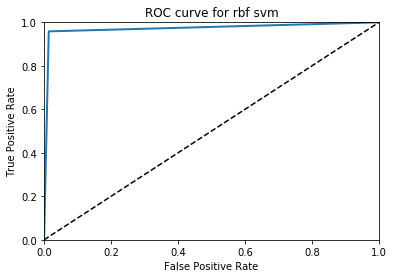

0.9722969338353954

In [13]:
# SVM with rbf kernal
rbf_svc = svm.SVC(kernel='rbf', gamma=0.0001, C=1000)
scores = cross_val_score(rbf_svc, X_train_scaled, Y_train, cv=5, n_jobs=-1,scoring="recall")
print("Recall Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(rbf_svc, X_train_scaled, Y_train, cv=5, n_jobs=-1,scoring="precision")
print("Precision Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(rbf_svc, X_train_scaled, Y_train, cv=5, n_jobs=-1,scoring="accuracy")
print("Accuracy Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
y_scores = cross_val_predict(rbf_svc, X_train_scaled, Y_train, cv=5)
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC curve for rbf svm')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

roc_auc_score(Y_train, y_scores)

Recall Score: 0.95 (+/- 0.08)
Precision Score: 0.96 (+/- 0.04)
Accuracy Score: 0.97 (+/- 0.03)


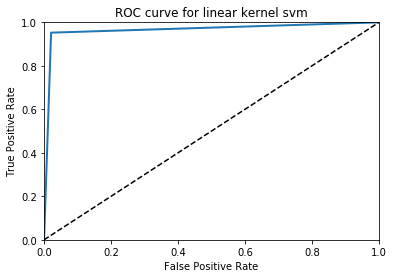

0.9658418504572351

In [14]:
# SVM with linear kernal
svc_lin = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(svc_lin, X_train_scaled, Y_train, cv=5, n_jobs=-1,scoring="recall")
print("Recall Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(svc_lin, X_train_scaled, Y_train, cv=5, n_jobs=-1,scoring="precision")
print("Precision Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(svc_lin, X_train_scaled, Y_train, cv=5, n_jobs=-1,scoring="accuracy")
print("Accuracy Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
y_scores = cross_val_predict(svc_lin, X_train_scaled, Y_train, cv=5)
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC curve for linear kernel svm')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

roc_auc_score(Y_train, y_scores)

Recall Score: 0.96 (+/- 0.07)
Precision Score: 0.97 (+/- 0.07)
Accuracy Score: 0.97 (+/- 0.03)


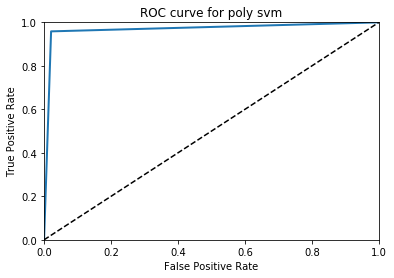

0.968800430338892

In [15]:
# SVM with poly kernal
poly_svc = svm.SVC(kernel='poly', degree=1, C=100)
scores = cross_val_score(poly_svc, X_train_scaled, Y_train, cv=5, n_jobs=-1,scoring="recall")
print("Recall Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(poly_svc, X_train_scaled, Y_train, cv=5, n_jobs=-1,scoring="precision")
print("Precision Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(poly_svc, X_train_scaled, Y_train, cv=5, n_jobs=-1,scoring="accuracy")
print("Accuracy Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
y_scores = cross_val_predict(poly_svc, X_train_scaled, Y_train, cv=5)
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC curve for poly svm')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

roc_auc_score(Y_train, y_scores)

Recall Score: 0.94 (+/- 0.13)
Precision Score: 0.98 (+/- 0.04)
Accuracy Score: 0.97 (+/- 0.04)


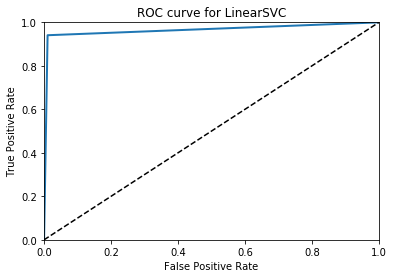

0.9651694459386767

In [16]:
# SVM with simple linearSVC
lin_svc = svm.SVC(C=1)
scores = cross_val_score(lin_svc, X_train_scaled, Y_train, cv=5, n_jobs=-1,scoring="recall")
print("Recall Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(lin_svc, X_train_scaled, Y_train, cv=5, n_jobs=-1,scoring="precision")
print("Precision Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores = cross_val_score(lin_svc, X_train_scaled, Y_train, cv=5, n_jobs=-1,scoring="accuracy")
print("Accuracy Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
y_scores = cross_val_predict(lin_svc, X_train_scaled, Y_train, cv=5)
fpr, tpr, thresholds = roc_curve(Y_train, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC curve for LinearSVC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

roc_auc_score(Y_train, y_scores)

## Model Testing on Hold out Data

+ In total 3 models show good performance on the training data - Logistic, SVC - poly and SVC-rbf wrt recall scoring.
+ All 3 models show a recall accuracy of 96% with sd of 6%. Looking at the ROC curves Logistic has slightly
+ more area under the curve. So Logistic is the finalized model that need to used on the final holdout data.
+ We can run each model on the test data and see how it is performing.

[[69  2]
 [ 3 40]]
Accuracy: 0.956140350877193
Precision: 0.9560881370091896
Recall: 0.956140350877193
F score: 0.9560357083576897


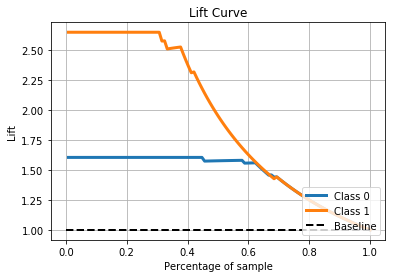

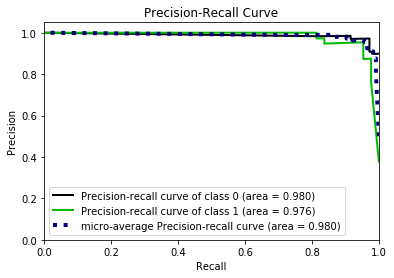

In [17]:
## Testing with kNN

knn_clf = neighbors.KNeighborsClassifier(weights = "distance",n_neighbors = 8)
knn_clf.fit(X_train_scaled,Y_train)
y_pred = knn_clf.predict(X_test_scaled)
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
print(conf_mat)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

y_probas = knn_clf.predict_proba(X_test_scaled)
skplt.metrics.plot_lift_curve(Y_test, y_probas, title='Lift Curve', ax=None, 
                                   figsize=None, title_fontsize='large', text_fontsize='medium')
skplt.metrics.plot_precision_recall_curve(Y_test, y_probas)

[[70  1]
 [ 3 40]]
Accuracy: 0.9649122807017544
Precision: 0.9652053622194477
Recall: 0.9649122807017544
F score: 0.9647382344750767


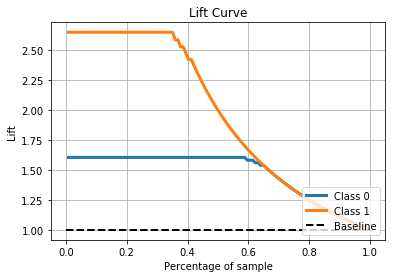

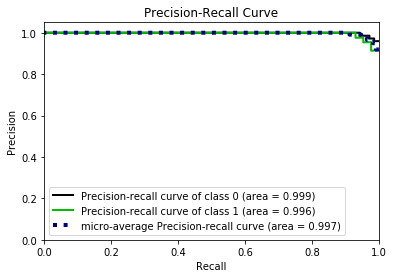

In [18]:
## Testing with Logistic

Logit_clf = linear_model.LogisticRegression(C = 0.2,penalty = 'l1')
Logit_clf.fit(X_train_scaled,Y_train)
y_pred = Logit_clf.predict(X_test_scaled)
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
print(conf_mat)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

y_probas = Logit_clf.predict_proba(X_test_scaled)
skplt.metrics.plot_lift_curve(Y_test, y_probas, title='Lift Curve', ax=None, 
                                   figsize=None, title_fontsize='large', text_fontsize='medium')
skplt.metrics.plot_precision_recall_curve(Y_test, y_probas)

[[67  4]
 [ 4 39]]
Accuracy: 0.9298245614035088
Precision: 0.9298245614035088
Recall: 0.9298245614035088
F score: 0.9298245614035088


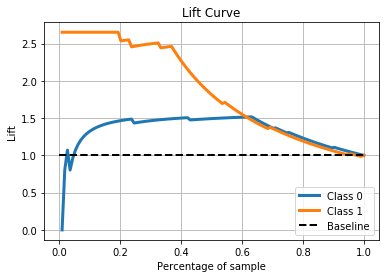

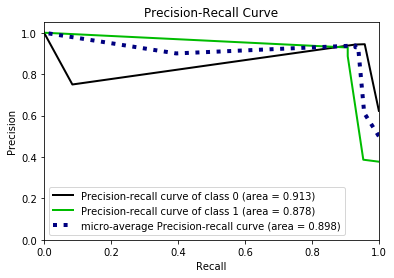

In [19]:
## Testing with Decision Trees

tree_clf = tree.DecisionTreeClassifier(max_depth = 5,min_samples_split = 10)
tree_clf.fit(X_train,Y_train)
y_pred = tree_clf.predict(X_test)
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
print(conf_mat)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

y_probas = tree_clf.predict_proba(X_test)
skplt.metrics.plot_lift_curve(Y_test, y_probas, title='Lift Curve', ax=None, 
                                   figsize=None, title_fontsize='large', text_fontsize='medium')
skplt.metrics.plot_precision_recall_curve(Y_test, y_probas)

[[71  0]
 [ 2 41]]
Accuracy: 0.9824561403508771
Precision: 0.9829367940398942
Recall: 0.9824561403508771
F score: 0.9823691172375383


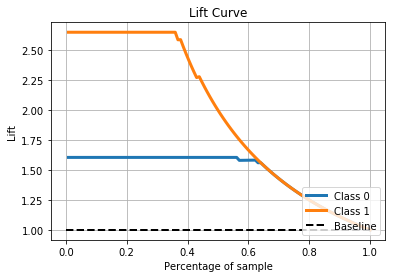

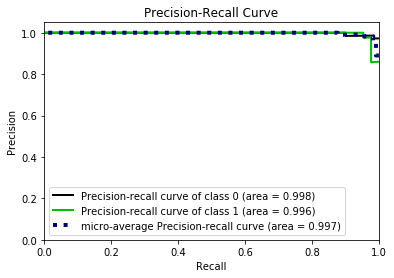

In [20]:
## Testing with svc rbf kernal

rbf_svc = svm.SVC(kernel='rbf', gamma=0.0001, C=1000,probability=True)
rbf_svc.fit(X_train_scaled,Y_train)
y_pred = rbf_svc.predict(X_test_scaled)
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
print(conf_mat)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

y_probas = rbf_svc.predict_proba(X_test_scaled)
skplt.metrics.plot_lift_curve(Y_test, y_probas, title='Lift Curve', ax=None, 
                                   figsize=None, title_fontsize='large', text_fontsize='medium')
skplt.metrics.plot_precision_recall_curve(Y_test, y_probas)

[[71  0]
 [ 3 40]]
Accuracy: 0.9736842105263158
Precision: 0.97475106685633
Recall: 0.9736842105263158
F score: 0.9734808562744625


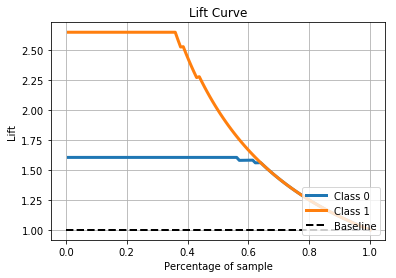

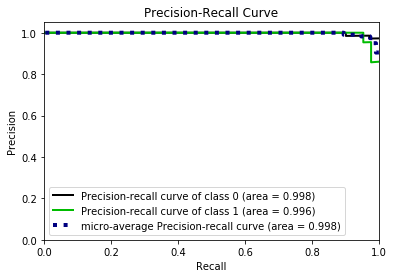

In [21]:
## Testing with SVC linear kernal
svc_lin = svm.SVC(kernel='linear', C=1,probability=True)
svc_lin.fit(X_train_scaled,Y_train)
y_pred = svc_lin.predict(X_test_scaled)
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
print(conf_mat)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

y_probas = svc_lin.predict_proba(X_test_scaled)
skplt.metrics.plot_lift_curve(Y_test, y_probas, title='Lift Curve', ax=None, 
                                   figsize=None, title_fontsize='large', text_fontsize='medium')
skplt.metrics.plot_precision_recall_curve(Y_test, y_probas)

[[71  0]
 [ 2 41]]
Accuracy: 0.9824561403508771
Precision: 0.9829367940398942
Recall: 0.9824561403508771
F score: 0.9823691172375383


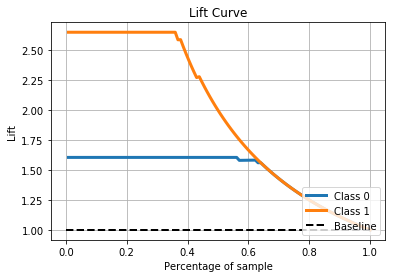

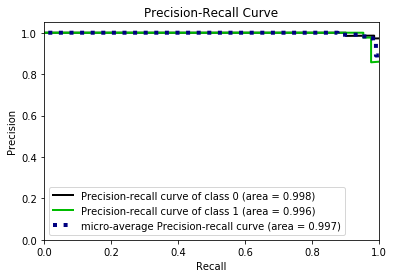

In [22]:
## Testing with SVC poly kernal
poly_svc = svm.SVC(kernel='poly', degree=1, C=100,probability=True)
poly_svc.fit(X_train_scaled,Y_train)
y_pred = poly_svc.predict(X_test_scaled)
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
print(conf_mat)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

y_probas = poly_svc.predict_proba(X_test_scaled)
skplt.metrics.plot_lift_curve(Y_test, y_probas, title='Lift Curve', ax=None, 
                                   figsize=None, title_fontsize='large', text_fontsize='medium')
skplt.metrics.plot_precision_recall_curve(Y_test, y_probas)

[[71  0]
 [ 2 41]]
Accuracy: 0.9824561403508771
Precision: 0.9829367940398942
Recall: 0.9824561403508771
F score: 0.9823691172375383


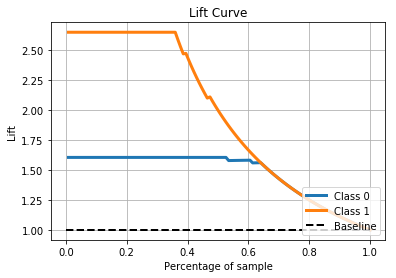

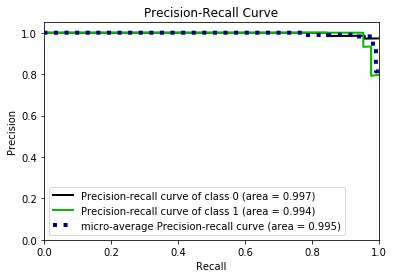

In [23]:
## Testing with linear SVC
lin_svc = svm.SVC(C=1,probability=True)
lin_svc.fit(X_train_scaled,Y_train)
y_pred = lin_svc.predict(X_test_scaled)
conf_mat = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
score = precision_recall_fscore_support(Y_test, y_pred, average='weighted')
precision, recall, fscore, k = score
print(conf_mat)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F score:",fscore)

y_probas = lin_svc.predict_proba(X_test_scaled)
skplt.metrics.plot_lift_curve(Y_test, y_probas, title='Lift Curve', ax=None, 
                                   figsize=None, title_fontsize='large', text_fontsize='medium')
skplt.metrics.plot_precision_recall_curve(Y_test, y_probas)

## Final Note

Of all the models tested SVM poly and SVM rbf show the best performance measured on below metrics

+ Accuracy: 0.9824561403508771
+ Precision: 0.9829367940398942
+ Recall: 0.9824561403508771
+ F score: 0.9823691172375383
+ Lift curve

Among the 2 models the rbf is the final selected model because of the below 2 metrics which are higher for rbf.
+ Area under precision recall curve: 0.997
+ area under ROC: 0.9722969338353954